In [28]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [29]:
wood_a = np.array([97, 80, 95, 77, 75, 97, 78, 63, 90, 92, 93, 78])
wood_b = np.array([79, 63, 89, 69, 69, 88, 80, 58, 92, 88, 83, 81])
d = wood_a - wood_b

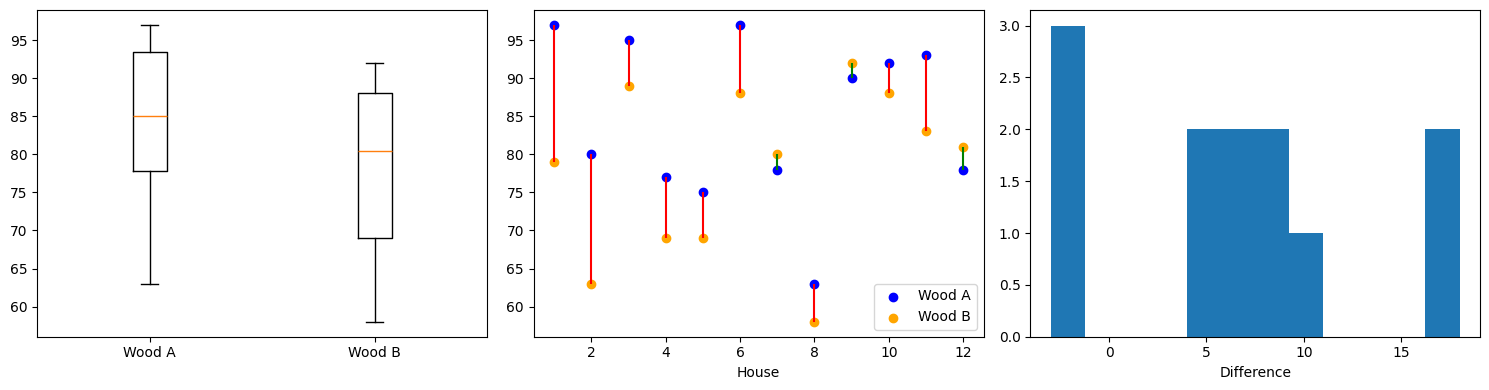

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axs[0].boxplot([wood_a, wood_b], tick_labels=["Wood A", "Wood B"])

axs[1].scatter(np.arange(1, len(wood_a) + 1), wood_a, label="Wood A", color="blue")
axs[1].scatter(np.arange(1, len(wood_b) + 1), wood_b, label="Wood B", color="orange")

for house_num, (indoor, outdoor) in enumerate(zip(wood_a, wood_b), start=1):
    lower, upper, color = (
        (indoor, outdoor, "green") if indoor < outdoor else (outdoor, indoor, "red")
    )

    axs[1].vlines(house_num, lower, upper, color=color)

axs[1].set_xlabel("House")
axs[1].legend()

axs[2].hist(d, bins=12)
axs[2].set_xlabel("Difference")

plt.tight_layout()
plt.show()

In [76]:
d_interval = (
    round(
        float(d.mean() + t.ppf(0.025, df=12 - 1) * d.std(ddof=1) / np.sqrt(len(d))), 3
    ),
    round(
        float(d.mean() - t.ppf(0.025, df=12 - 1) * d.std(ddof=1) / np.sqrt(len(d))), 3
    ),
)
d_interval

(2.021, 10.645)

In [ ]:
wood_a_interval = (
    wood_a.mean() + t.ppf(0.025, 11) * wood_a.std(ddof=1) / np.sqrt(12),
    wood_a.mean() - t.ppf(0.025, 11) * wood_a.std(ddof=1) / np.sqrt(12),
)
wood_b_interval = (
    wood_b.mean() + t.ppf(0.025, 11) * wood_b.std(ddof=1) / np.sqrt(12),
    wood_b.mean() - t.ppf(0.025, 11) * wood_b.std(ddof=1) / np.sqrt(12),
)

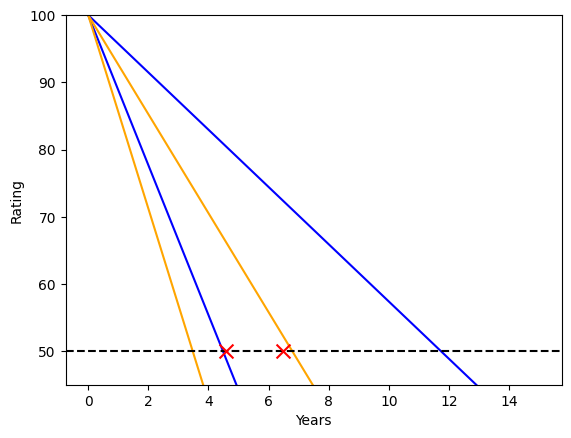

In [90]:
wood_a_slope = ((wood_a_interval[1] + wood_a_interval[0]) / 2 - 100) / 2
wood_a_upper_slope = (wood_a_interval[1] - 100) / 2
wood_a_lower_slope = (wood_a_interval[0] - 100) / 2

wood_b_slope = ((wood_b_interval[1] + wood_b_interval[0]) / 2 - 100) / 2
wood_b_upper_slope = (wood_b_interval[1] - 100) / 2
wood_b_lower_slope = (wood_b_interval[0] - 100) / 2

wood_a_intersection = -50 / wood_a_slope
wood_a_upper_intersection = -50 / wood_a_upper_slope
wood_a_lower_intersection = -50 / wood_a_lower_slope

wood_b_intersection = -50 / wood_b_slope
wood_b_upper_intersection = -50 / wood_b_upper_slope
wood_b_lower_intersection = -50 / wood_b_lower_slope

x = np.array([0, 15])

# plt.plot(x, wood_a_slope * x + 100, color="blue")
plt.plot(x, wood_a_lower_slope * x + 100, color="blue")
plt.plot(x, wood_a_upper_slope * x + 100, color="blue")


# plt.plot(x, wood_b_slope * x + 100, color="orange")
plt.plot(x, wood_b_lower_slope * x + 100, color="orange")
plt.plot(x, wood_b_upper_slope * x + 100, color="orange")

plt.axhline(50, color="black", ls="--")

plt.scatter(
    [wood_a_intersection, wood_b_intersection],
    [50, 50],
    marker="x",
    color="red",
    s=100,
    zorder=10,
)

plt.xlabel("Years")
plt.ylabel("Rating")
plt.ylim(45, 100)

plt.show()

In [ ]:
print("Wood A: ", (wood_a_lower_intersection, wood_a_upper_intersection))
print("Wood B: ", (wood_b_lower_intersection, wood_b_upper_intersection))

Wood A:  (np.float64(4.482225481250043), np.float64(11.732974905389318))
Wood B:  (np.float64(3.476019142681192), np.float64(6.788193994726428))


In [87]:
wood_a_intersection, wood_b_intersection

(np.float64(6.486486486486484), np.float64(4.597701149425287))